# Linear Regression
Within this activity, we're going to try to predict how much someone will be charged depending on their medical symptoms. The dataset that we'll be working with consists of 7 columns (age, sex, bmi, children, smoker, region, and charges) and we'll be doing the following:
- Loading in the dataset
- Checking if there are any NaN variables
- One-hot encoding the categorical variables
- Univariate Regression: Split the data into a training/testing set using only BMI and charges.
- Univariate Regression: Train our model using the training dataset
- Univariate Regression: Predict on our test set and come up with an MAE metric
- Multivariate Regression: Split the data into a training/testing set using all variables
- Multivariate Regression: Trin our model using the training dataset
- Multivariate Regression: Predict on our test set and come up with an MAE metric

### Data Pre-processing

In [3]:
import pandas as pd

# Load in the dataset
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Check each variable to see if there are any NaNs. If so, delete these rows.
data = data.dropna(axis=0)

In [5]:
# One Hot Encode the categorical variables.
def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")
    
    dataframe = pd.concat([dataframe, dummies], axis=1)
    
    dataframe = dataframe.drop([name_of_column], axis=1)
    
    return dataframe

data = _transform_column_into_dummies(data, "sex")
data = _transform_column_into_dummies(data, "smoker")
data = _transform_column_into_dummies(data, "region")

### Univariate Regression
To understand how Linear Regression works with one variable, we're going to use only `BMI` in order to predict `charges`. In a real world situation, using only a single variable to predict another variable is never done. However, what we're going to do is first train/predict using only `BMI` and then compare these predictions via our error metric (Mean Absolute Error or MAE) to a model that's trained with all variables. What do you think will perform better?

In [6]:
# Univariate Regression: Using ONLY bmi, split the dataset into an 80/20 training/testing split with predicting charges.
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data["bmi"])
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


<AxesSubplot: xlabel='bmi', ylabel='charges'>

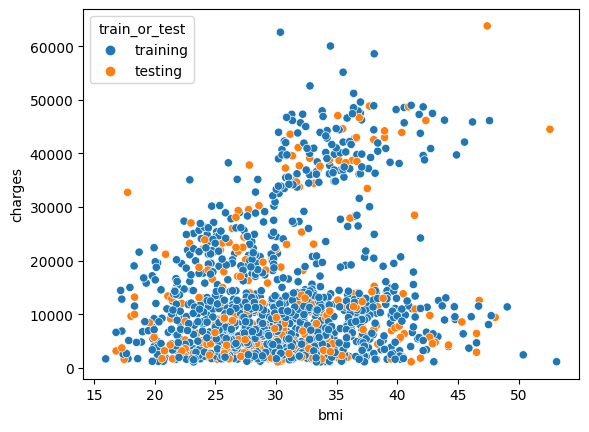

In [19]:
# Univariate Regression: For practice, plot the BMI/Charges in a scatter plot such that the observation's color depends on whether it is in the training or testing set.
import seaborn as sns

training_indices = X_train.index
testing_indices = X_test.index

for idx, row in data.iterrows():
    if idx in training_indices:
        data.loc[idx, "train_or_test"] = "training"
    else:
        data.loc[idx, "train_or_test"] = "testing"

sns.scatterplot(
    data = data,
    x = "bmi",
    y = "charges",
    hue = "train_or_test"
)


In [8]:
# Univariate Regression: Train a linear regression model using only the training set.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Univariate Regression: Predict on the test set and save these predictions to a variable.
lr_predictions_univariate = lr.predict(X_test)

In [21]:
# Univariate Regression: What is the MAE of the dataset?
from sklearn.metrics import mean_absolute_error

print(f"Linear Regression MAE: {mean_absolute_error(y_test, lr_predictions_univariate)}")

Linear Regression MAE: 4181.194473753645


In [22]:
# Univariate Regression: Challenging Question: If you were to repeat this step without adding any extra parameters 
# to your previous code, the results will be different. Why would this be the case? Think about the datasets that 
# were created. By looking into the documentation, which parameter could you change to make sure this is the same?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multivariate Regression
Now, that we have an MAE for our univariate case, let's use all variables in order to train and predict!

In [23]:
# Multivariate Regression: Now using all of the variables within your dataset, what are the data types of each column?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   bmi                  1338 non-null   float64
 2   children             1338 non-null   int64  
 3   charges              1338 non-null   float64
 4   sex = _female        1338 non-null   uint8  
 5   sex = _male          1338 non-null   uint8  
 6   smoker = _no         1338 non-null   uint8  
 7   smoker = _yes        1338 non-null   uint8  
 8   region = _northeast  1338 non-null   uint8  
 9   region = _northwest  1338 non-null   uint8  
 10  region = _southeast  1338 non-null   uint8  
 11  region = _southwest  1338 non-null   uint8  
 12  train_or_test        1338 non-null   object 
dtypes: float64(2), int64(2), object(1), uint8(8)
memory usage: 62.8+ KB


In [24]:
# Multivariate Regression: Split the entire dataset using all columns into a 80/20 training and testing split.
X = data.drop(["charges", "train_or_test"], axis=1)
y= data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Multivariate Regression: Train and Predict on the test set.
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions_multivariate = lr.predict(X_test)

In [26]:
# Multivariate Regression: What is the MAE of the dataset? Did the performance increase or decrease from 
# the univariate case?
print(f"Linear Regression MAE: {mean_absolute_error(y_test, lr_predictions_multivariate)}")

Linear Regression MAE: 4181.194473753645


In [28]:
# Multivariate Regression: Challenging Question: If you were to increase age by one unit _while holding all other
# variables constant_, how much would the charges increase by? How did you figure this out?
print(f"Intercept: {lr.intercept_}")
for idx in range(len(list(X_train.columns))):
    print(list(X_train.columns)[idx], lr.coef_[idx])

# Therefore, increasing age by 1 unit would result in charges going up by 256.97

Intercept: -574.5357125101909
age 256.97570583119403
bmi 337.0925519487763
children 425.27878352427666
sex = _female 9.295845820510051
sex = _male -9.295845820508326
smoker = _no -11825.564427880614
smoker = _yes 11825.564427880612
region = _northeast 459.5852442437286
region = _northwest 88.90791801592506
region = _southeast -198.27905232091243
region = _southwest -350.21410993874065
